In [1]:
import os
import sys
import csv
import numpy as np
from sklearn import svm
#from sklearn.metrics import confusion_matrix as cmat
import collections
import itertools
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
#from sklearn.metrics import classification_report as report  
from sklearn.model_selection import *
from sklearn.feature_selection import *
from sklearn.metrics import *
import matplotlib.pyplot as plt
import time
import random
import numpy
from datetime import datetime
import pandas as pd
import requests
import re
import xarray as xr
import pickle
import seaborn as sns


In [2]:
#Load data
directory = '../data/hot_rosette'
filename = directory+'/'+'HOT_N.csv'

ross_data = pd.read_csv(filename)

In [24]:
ross_data.head(10)
ross_data.astype(bool).sum(axis=0)

Unnamed: 0        13866
STNNBR            13867
DATE              13867
TIME              13867
LATITUDE          13867
LONGITUDE         13867
CTDPRS            13867
CTDTMP            13867
CTDSAL            13867
CTDOXY            13867
CTDSAL_FLAG_W     13867
OXYGEN            13867
OXYGEN_FLAG_W     13867
SILCAT            13867
SILCAT_FLAG_W     13867
PHSPHT            13845
PHSPHT_FLAG_W     13867
NO2+NO3           12934
NO2+NO3_FLAG_W    13867
dtype: int64

In [3]:
oxygen = ross_data['OXYGEN']
silcat = ross_data['SILCAT']
nitros = ross_data['NO2+NO3']
phosph = ross_data['PHSPHT']

multioutput = ross_data[['OXYGEN','SILCAT','NO2+NO3','PHSPHT']]

parameters = ross_data[['DATE','TIME','LATITUDE','LONGITUDE','CTDPRS','CTDTMP','CTDSAL']]

tr_X, pr_X, tr_y, pr_y = train_test_split(parameters, multioutput, test_size=0.33, random_state=42)

In [4]:
parameters.head(10)

,DATE,TIME,LATITUDE,LONGITUDE,CTDPRS,CTDTMP,CTDSAL
0,20030619.0,1157.0,22.7492,-157.9937,5.0,25.7847,35.1981
1,20030619.0,1157.0,22.7492,-157.9937,550.5,6.7576,34.0342
2,20030619.0,1157.0,22.7492,-157.9937,799.9,5.0247,34.3160
3,20030619.0,1157.0,22.7492,-157.9937,1000.7,4.2052,34.4633
4,20030619.0,1157.0,22.7492,-157.9937,1199.8,3.6222,34.5260
5,20030619.0,1157.0,22.7492,-157.9937,1401.0,3.0480,34.5574
6,20030619.0,1157.0,22.7492,-157.9937,1599.6,2.6808,34.5855
7,20030619.0,1157.0,22.7492,-157.9937,1799.7,2.4184,34.6011
8,20030619.0,1157.0,22.7492,-157.9937,1999.8,2.1287,34.6217
9,20030619.0,1157.0,22.7492,-157.9937,2200.0,1.9274,34.6329


In [5]:
multirf = MultiOutputRegressor(RandomForestRegressor(n_jobs=-1,n_estimators=200,criterion='mse'))

multirf.fit(tr_X,tr_y)

MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
           n_jobs=1)

In [6]:
#Predict set:
predicted_multi = multirf.predict(pr_X)    

score_multi = multirf.score(pr_X, pr_y)
print('RF Score:', score_multi)

#Explained variance score:
var_multi = explained_variance_score(pr_y, predicted_multi, multioutput='raw_values')
#var_multi = explained_variance_score(pr_y, predicted_multi)

print('Variance Score:', var_multi)


#Mean Absolute Error:
mabs_multi = mean_absolute_error(pr_y, predicted_multi,  multioutput='raw_values')
#mabs_multi = mean_absolute_error(pr_y, predicted_multi)
print('Mean Abs Error:', mabs_multi)

#Mean Squared Error:
msq_multi = mean_squared_error(pr_y, predicted_multi, multioutput='raw_values')
print('Mean Squared Error:', msq_multi)

#R^2 score:
r2_multi = r2_score(pr_y, predicted_multi, multioutput='raw_values')
print('R^2 Error:', r2_multi)

('RF Score:', 0.79776853852673768)
('Variance Score:', array([ 0.5827748 ,  0.61291595,  0.99903463,  0.99689594]))
('Mean Abs Error:', array([  3.52433935e+01,   4.12285803e+00,   2.79706755e-01,
         3.19737285e-02]))
('Mean Squared Error:', array([  1.72678906e+04,   2.46270233e+03,   2.86067291e-01,
         4.49496530e-03]))
('R^2 Error:', array([ 0.58253254,  0.61261278,  0.99903397,  0.99689486]))


In [7]:
# plot observation vs prediction

true_values = pr_y.values.astype(float)
predicted_values = np.array(predicted_multi)

splot = sns.relplot(data=true_values);
plt.show()
#splot.savefig('HOT_N_SVR_CV.png')

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
# fit random forest model - Oxygen
tr_X, pr_X, tr_y, pr_y = train_test_split(parameters, oxygen, test_size=0.33, random_state=42)
model_ox = RandomForestRegressor(n_estimators=200, random_state=42)
model_ox.fit(tr_X, tr_y)
# show importance scoresces_)
# plot importance scor
#print(model_ox.feature_importances_)

names = parameters.columns.values[0:7]
ticks = [i for i in range(len(names))]
plt.bar(ticks, model_ox.feature_importances_)
plt.title('Oxygen regression importance')
plt.xticks(ticks, names,rotation='vertical')
plt.show()

predicted_ox = model_ox.predict(pr_X)  

score_ox = model_ox.score(pr_X, pr_y)
print('RF Score:', score_ox)

#Explained variance score:
var_ox = explained_variance_score(pr_y, predicted_ox)
#var_multi = explained_variance_score(pr_y, predicted_multi)

print('Variance Score:', var_ox)

#Mean Absolute Error:
mabs_ox = mean_absolute_error(pr_y, predicted_ox)
#mabs_multi = mean_absolute_error(pr_y, predicted_multi)
print('Mean Abs Error:', mabs_ox)

#Mean Squared Error:
msq_ox = mean_squared_error(pr_y, predicted_ox)
print('Mean Squared Error:', msq_ox)

#R^2 score:
r2_ox = r2_score(pr_y, predicted_ox)
print('R^2 Error:', r2_ox)

# plot observation vs prediction
dict_result = {'observation': pr_y.values.astype(float).flatten(), 'prediction': np.array(predicted_ox)}
df_result = pd.DataFrame(dict_result)
splot = sns.relplot(x="observation", y="prediction", data=df_result);
axes = splot.axes.flatten()
axes[0].set_title('Oxygen prediction relational')
plt.show()
#splot.savefig('HOT_N_SVR_1.png')

In [40]:
scores_ox = cross_val_score(model_ox, parameters, oxygen,cv=10, scoring='r2')
print("RFR 10-fold:", scores_ox)
print("RFR 10-fold mean: %0.2f (+/- %0.2f)" % (scores_ox.mean(), scores_ox.std() * 2))

('RFR 10-fold:', array([-0.05478349,  0.3039111 ,  0.24713282,  0.27927413,  0.38943532,
        0.06055401, -0.11648712, -0.05778617,  0.237212  ,  0.14179951]))
RFR 10-fold mean: 0.14 (+/- 0.33)


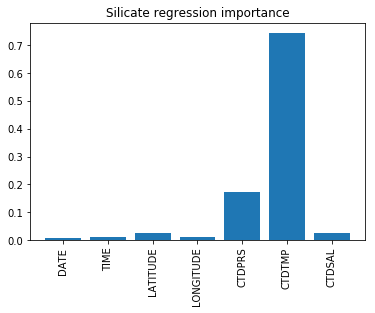

('RF Score:', 0.61325991426078896)
('Variance Score:', 0.61356918776215019)
('Mean Abs Error:', 4.1151136780694371)
('Mean Squared Error:', 2458.5883936680093)
('R^2 Error:', 0.61325991426078896)


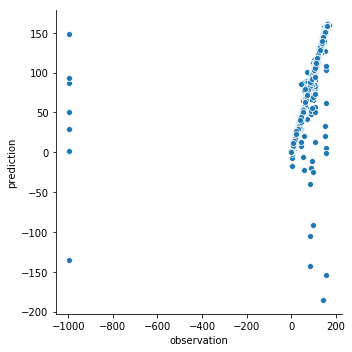

In [26]:
# fit random forest model - Silicates
tr_X, pr_X, tr_y, pr_y = train_test_split(parameters, silcat, test_size=0.33, random_state=42)
model_si = RandomForestRegressor(n_estimators=200, random_state=42)
model_si.fit(tr_X, tr_y)
# show importance scoresces_)
# plot importance scor
#print(model_ox.feature_importances_)

names = parameters.columns.values[0:7]
ticks = [i for i in range(len(names))]
plt.bar(ticks, model_si.feature_importances_)
plt.title('Silicate regression importance')
plt.xticks(ticks, names,rotation='vertical')
plt.show()

predicted_si = model_si.predict(pr_X)  

score_si = model_si.score(pr_X, pr_y)
print('RF Score:', score_si)

#Explained variance score:
var_si = explained_variance_score(pr_y, predicted_si)
#var_multi = explained_variance_score(pr_y, predicted_multi)

print('Variance Score:', var_si)

#Mean Absolute Error:
mabs_si = mean_absolute_error(pr_y, predicted_si)
#mabs_multi = mean_absolute_error(pr_y, predicted_multi)
print('Mean Abs Error:', mabs_si)

#Mean Squared Error:
msq_si = mean_squared_error(pr_y, predicted_si)
print('Mean Squared Error:', msq_si)

#R^2 score:
r2_si = r2_score(pr_y, predicted_si)
print('R^2 Error:', r2_si)

# plot observation vs prediction
dict_result = {'observation': pr_y.values.astype(float).flatten(), 'prediction': np.array(predicted_si)}
df_result = pd.DataFrame(dict_result)
splot = sns.relplot(x="observation", y="prediction", data=df_result);
plt.show()
#splot.savefig('HOT_N_SVR_1.png')

In [41]:
scores_si = cross_val_score(model_si, parameters, silcat, cv=10,scoring='r2')
print("RFR 10-fold:", scores_si)
print("RFR 10-fold : %0.2f (+/- %0.2f)" % (scores_si.mean(), scores_si.std() * 2))

('RFR 10-fold:', array([ 0.57679011,  0.56747396,  0.54928719,  0.51796954,  0.92847045,
        0.4887528 ,  0.56755426,  0.75906864,  0.88076354,  0.96988247]))
RFR 10-fold : 0.68 (+/- 0.35)


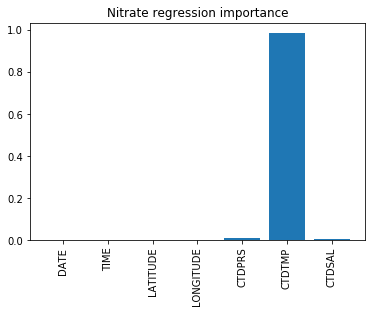

('RF Score:', 0.99902819797019538)
('Variance Score:', 0.99902875528155044)
('Mean Abs Error:', 0.28017309471789642)
('Mean Squared Error:', 0.28777630970787155)
('R^2 Error:', 0.99902819797019549)


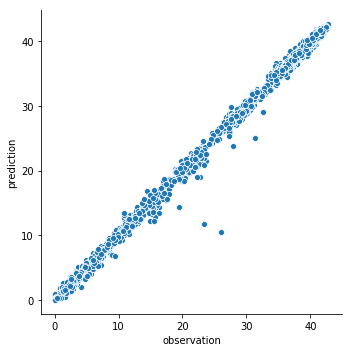

In [34]:
# fit random forest model - Nitrate
tr_X, pr_X, tr_y, pr_y = train_test_split(parameters, nitros, test_size=0.33, random_state=42)
model_no = RandomForestRegressor(n_estimators=200, random_state=42)
model_no.fit(tr_X, tr_y)
# show importance scoresces_)
# plot importance scor
#print(model_ox.feature_importances_)

names = parameters.columns.values[0:7]
ticks = [i for i in range(len(names))]
plt.bar(ticks, model_no.feature_importances_)
plt.title('Nitrate regression importance')
plt.xticks(ticks, names,rotation='vertical')
plt.show()

predicted_no = model_no.predict(pr_X)  

score_no = model_no.score(pr_X, pr_y)
print('RF Score:', score_no)

#Explained variance score:
var_no = explained_variance_score(pr_y, predicted_no)
#var_multi = explained_variance_score(pr_y, predicted_multi)

print('Variance Score:', var_no)

#Mean Absolute Error:
mabs_no = mean_absolute_error(pr_y, predicted_no)
#mabs_multi = mean_absolute_error(pr_y, predicted_multi)
print('Mean Abs Error:', mabs_no)

#Mean Squared Error:
msq_no = mean_squared_error(pr_y, predicted_no)
print('Mean Squared Error:', msq_no)

#R^2 score:
r2_no = r2_score(pr_y, predicted_no)
print('R^2 Error:', r2_no)

# plot observation vs prediction
dict_result = {'observation': pr_y.values.astype(float).flatten(), 'prediction': np.array(predicted_no)}
df_result = pd.DataFrame(dict_result)
splot = sns.relplot(x="observation", y="prediction", data=df_result);
plt.show()
#splot.savefig('HOT_N_SVR_1.png')

In [42]:
scores_no = cross_val_score(model_no, parameters, nitros, cv=10,scoring='r2')
print("RFR 10-fold:", scores_no)
print("RFR 10-fold : %0.2f (+/- %0.2f)" % (scores_no.mean(), scores_no.std() * 2))

('RFR 10-fold:', array([ 0.9994396 ,  0.99915034,  0.99903284,  0.99939601,  0.99915043,
        0.99927889,  0.99919441,  0.99910678,  0.99633024,  0.99940051]))
RFR 10-fold : 1.00 (+/- 0.00)


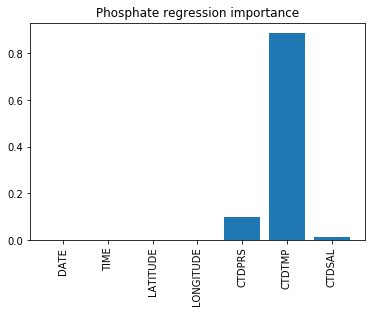

('RF Score:', 0.9969466956623384)
('Variance Score:', 0.9969473435041144)
('Mean Abs Error:', 0.031921313347274709)
('Mean Squared Error:', 0.0044199233647554742)
('R^2 Error:', 0.9969466956623384)


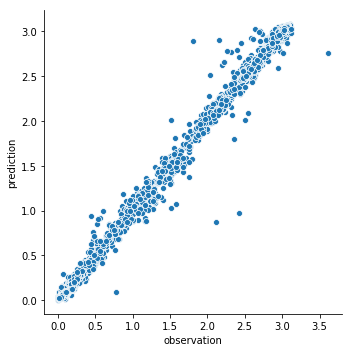

In [44]:
# fit random forest model - Phosphate
tr_X, pr_X, tr_y, pr_y = train_test_split(parameters, phosph, test_size=0.33, random_state=42)
model_ph = RandomForestRegressor(n_estimators=200, random_state=42)
model_ph.fit(tr_X, tr_y)
# show importance scoresces_)
# plot importance scor
#print(model_ox.feature_importances_)

names = parameters.columns.values[0:7]
ticks = [i for i in range(len(names))]
plt.bar(ticks, model_ph.feature_importances_)
plt.title('Phosphate regression importance')
plt.xticks(ticks, names,rotation='vertical')
plt.show()

predicted_ph = model_ph.predict(pr_X)  

score_ph = model_ph.score(pr_X, pr_y)
print('RF Score:', score_ph)

#Explained variance score:
var_ph = explained_variance_score(pr_y, predicted_ph)
#var_multi = explained_variance_score(pr_y, predicted_multi)

print('Variance Score:', var_ph)

#Mean Absolute Error:
mabs_ph = mean_absolute_error(pr_y, predicted_ph)
#mabs_multi = mean_absolute_error(pr_y, predicted_multi)
print('Mean Abs Error:', mabs_ph)

#Mean Squared Error:
msq_ph = mean_squared_error(pr_y, predicted_ph)
print('Mean Squared Error:', msq_ph)

#R^2 score:
r2_ph = r2_score(pr_y, predicted_ph)
print('R^2 Error:', r2_ph)

# plot observation vs prediction
dict_result = {'observation': pr_y.values.astype(float).flatten(), 'prediction': np.array(predicted_ph)}
df_result = pd.DataFrame(dict_result)
splot = sns.relplot(x="observation", y="prediction", data=df_result);
plt.show()
#splot.savefig('HOT_N_SVR_1.png')

In [45]:
scores_ph = cross_val_score(model_ph, parameters, phosph, cv=10,scoring='r2')
print("RFR 10-fold:", scores_ph)
print("RFR 10-fold : %0.2f (+/- %0.2f)" % (scores_ph.mean(), scores_ph.std() * 2))

('RFR 10-fold:', array([ 0.99476443,  0.99438958,  0.99687975,  0.99751177,  0.99700628,
        0.99637504,  0.98354381,  0.9973448 ,  0.99021661,  0.99843229]))
RFR 10-fold : 0.99 (+/- 0.01)


In [ ]:
predicted_multi = pd.DataFrame(predicted_multi,columns=['OXYGEN','SILCAT','NO2+NO3','PHSPHT'])

predicted_multi['Label']='predicted'

#predicted_multi['Label']='predicted'

validation_set = pr_y.copy(deep=True)
validation_set['Label']='real'

prediction_pairs = pd.DataFrame()

prediction_pairs = pd.concat([predicted_multi,validation_set], ignore_index=True)

In [34]:
prediction_pairs.to_csv(directory+'/'+'predicted_nutrients.csv',index=False)
directory

'../data/hot_rosette'

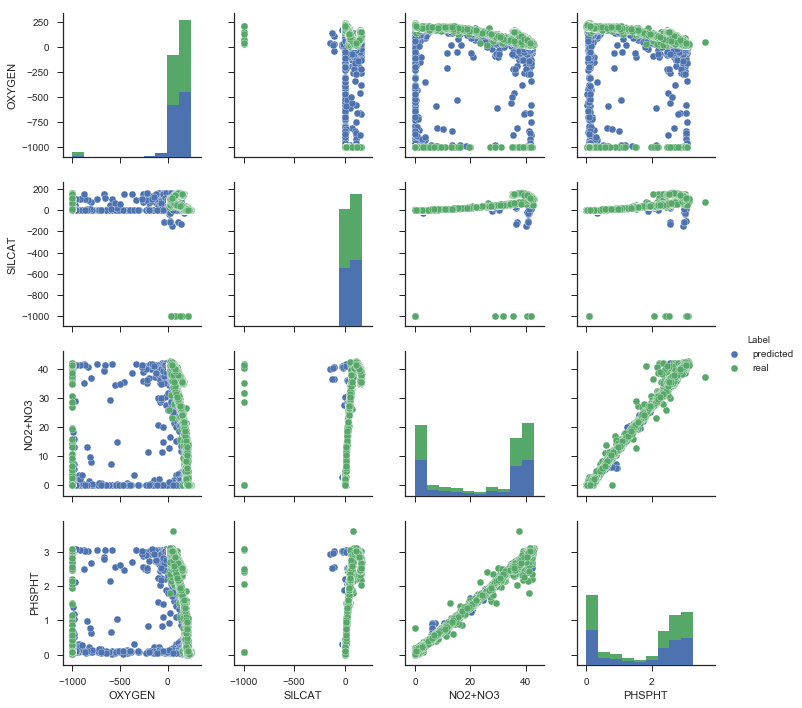

In [29]:
#prediction_pairs

sns.set(style="ticks")
sns.pairplot(prediction_pairs,hue='Label', vars=multioutput)

plt.show()